In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import itertools

In [2]:
num_clients = 20
# alpha = 100
alpha = 0.01
num_cls = 10
num_tasks = 5

num_class_per_task = 2

In [3]:
alpha *= np.ones(num_cls)
# s = np.random.dirichlet(alpha, num_clients).transpose()

s = np.random.dirichlet(alpha, num_clients).transpose()  # s.shape will be (num_cls, num_clients)

s.shape

(10, 20)

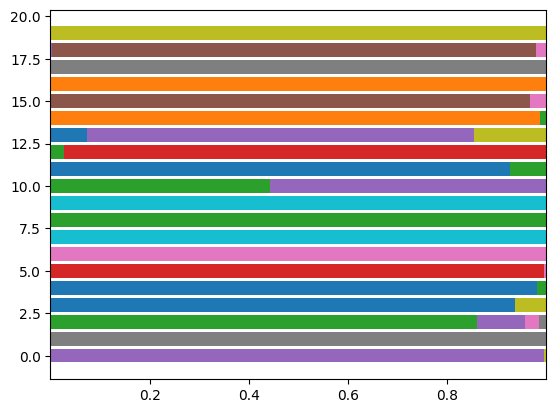

In [4]:

# Loop over the number of classes
for i in range(num_cls):
    plt.barh(range(num_clients), s[i], left=np.sum(s[:i], axis=0), color="C"+str(i))

In [5]:

drawn_classes = np.zeros((num_cls, num_clients, num_tasks))  # Added num_tasks dimension

# Sampling classes for each agent for each task
for t in range(num_tasks):
    for i in range(num_clients):
        probs = s[:, i]
        sampled_classes = np.random.choice(num_cls, num_class_per_task, replace=False, p=probs)
        drawn_classes[sampled_classes, i, t] = 1


drawn_classes

array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        

In [6]:
drawn_classes.shape

(10, 20, 5)

In [7]:
sum_similarities = 0

# Calculate similarity for each unique pair of agents
for i in range(num_clients):
    for j in range(i+1, num_clients):  # Avoid comparing the agent with itself and avoid duplicate comparisons
        intersection = np.sum(np.logical_and(drawn_classes[:, i], drawn_classes[:, j]))
        union = np.sum(np.logical_or(drawn_classes[:, i], drawn_classes[:, j]))
        similarity = intersection / union if union != 0 else 0  # Avoid division by zero
        sum_similarities += similarity

# Calculate the average similarity
average_similarity = sum_similarities / (num_clients * (num_clients - 1) / 2)  # Number of unique pairs is n*(n-1)/2
print("Average Similarity between all agents: ", average_similarity)

Average Similarity between all agents:  0.13394578010840025


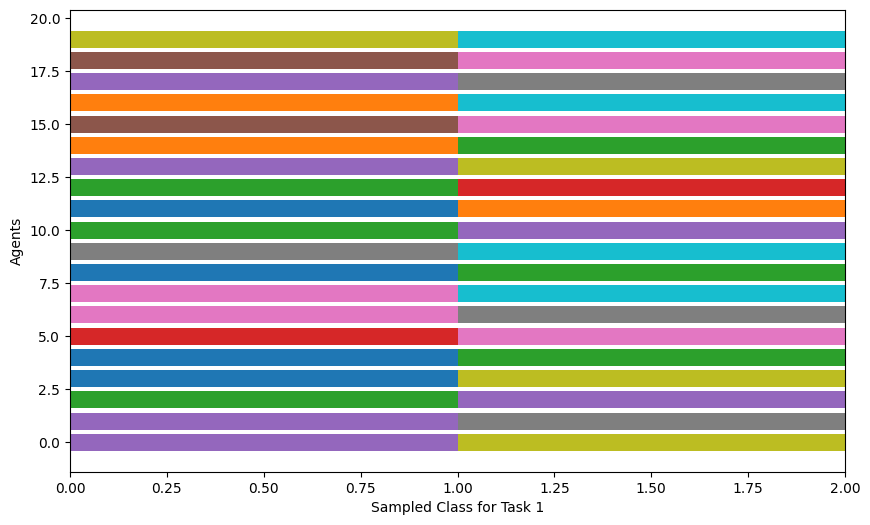

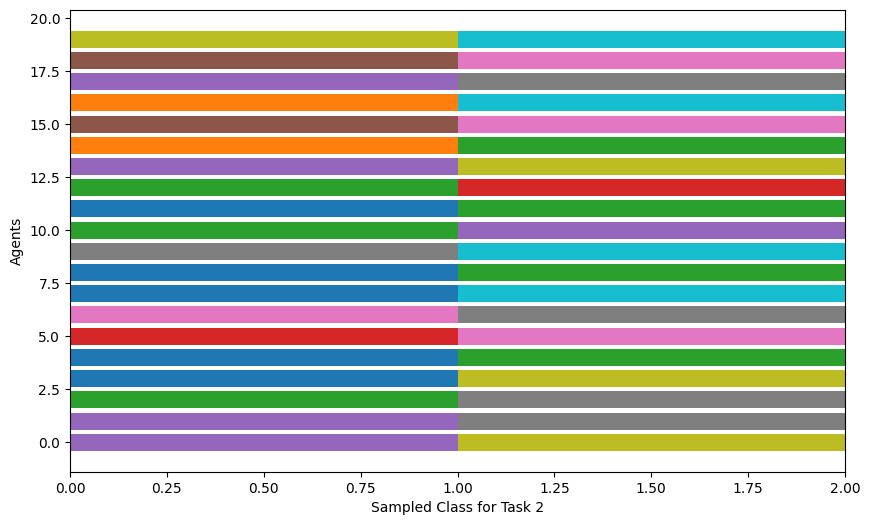

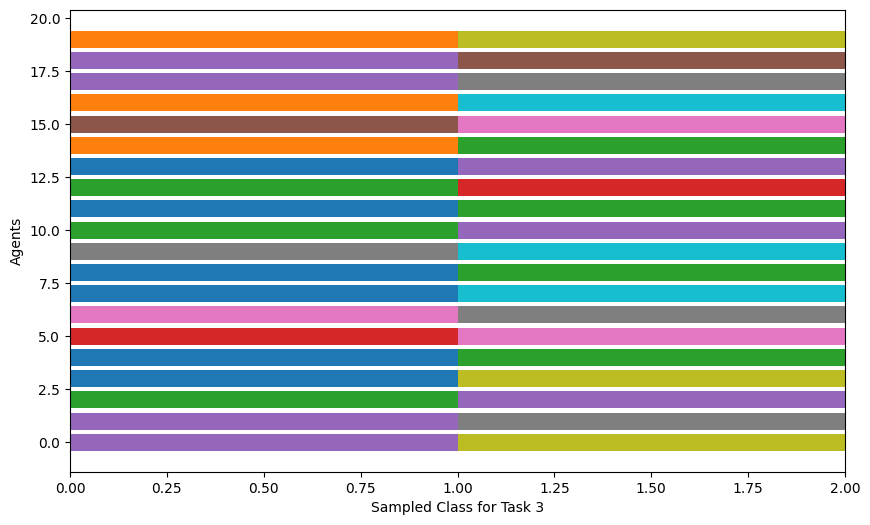

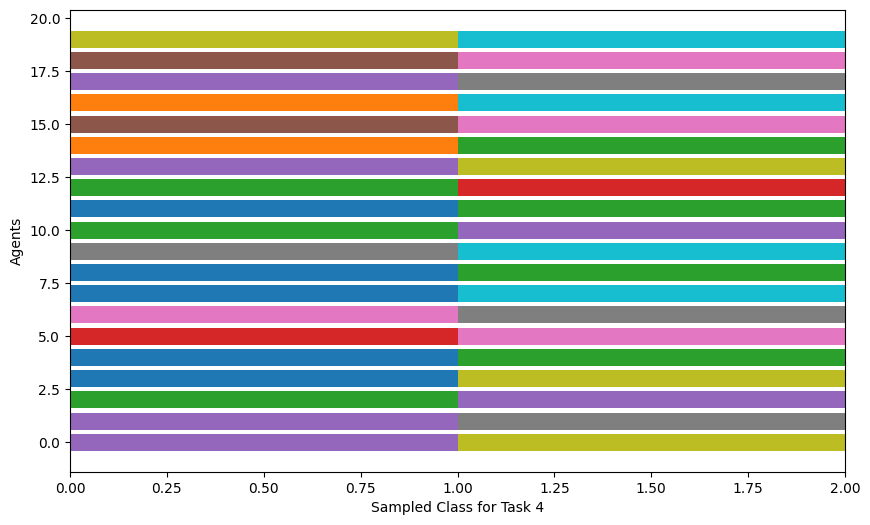

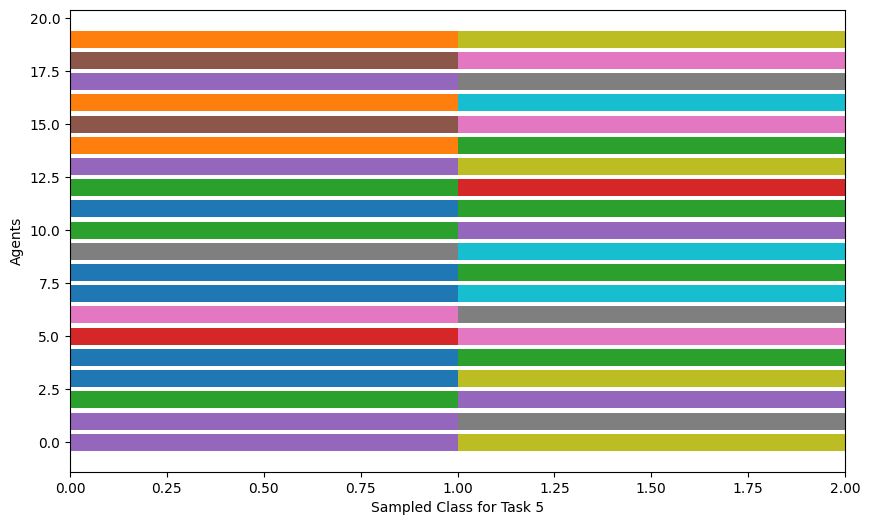

In [8]:
# Visualizing sampled classes for each agent for each task
for t in range(num_tasks):
    plt.figure(figsize=(10, 6))  # Optional: Adjust figure size as per your requirement
    for i in range(num_cls):
        plt.barh(range(num_clients), drawn_classes[i, :, t], left=np.sum(drawn_classes[:i, :, t], axis=0), color="C"+str(i))
    
    plt.ylabel('Agents')
    plt.xlabel(f'Sampled Class for Task {t+1}');

In [9]:

def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

total_similarity = 0
total_pairs = 0

# Loop over all tasks
for t in range(num_tasks):
    # Loop over all unique pairs of agents
    for agent1, agent2 in itertools.combinations(range(num_clients), 2):
        classes_agent1 = set(np.where(drawn_classes[:, agent1, t] == 1)[0])
        classes_agent2 = set(np.where(drawn_classes[:, agent2, t] == 1)[0])
        
        similarity = jaccard_similarity(classes_agent1, classes_agent2)
        
        total_similarity += similarity
        total_pairs += 1

average_similarity = total_similarity / total_pairs if total_pairs != 0 else 0
print("Average Similarity: ", average_similarity)

Average Similarity:  0.13789473684210474
